# Принятие решений в бизнесе

Проект выполнен для проверки списка гипотез по увеличению выручки. 

Цель: приоритизация гипотез, запуск A/B-теста и анализа результатов. 

Входные данные: список гипотез подготовлен с отделом маркетинга крупного интернет-магазина. Для второй части используются данные о заказах и посетителях.

План работы:

1. Сделать обзор данных, провести предобработку
2. Приоритизировать гипотезы
3. Проанализировать результаты A/B-тестирования
4. Сделать вывод

##  Обзор данных

In [ ]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
import scipy.stats as stats

In [ ]:
hypo = pd.read_csv('/datasets/hypothesis.csv', sep=',')
pd.options.display.max_colwidth = 150
hypo

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [ ]:
hypo.columns = hypo.columns.str.lower()
hypo

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [ ]:
orders = pd.read_csv('/datasets/orders.csv', sep=',')
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [ ]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [ ]:
orders.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [ ]:
orders.duplicated().sum()

0

In [ ]:
visitors = pd.read_csv('/datasets/visitors.csv', sep=',')
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [ ]:
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [ ]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [ ]:
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

In [ ]:
visitors.duplicated().sum()

0

Проведена предобработка данных. Дубликатов и пропусков не обнаружено.

## Приоритизация гипотез

Применим фреймворк ICE для приоритизации гипотез.

In [ ]:
hypo['ICE'] = round((hypo['impact'] * hypo['confidence'])/hypo['efforts'], 2)

hypo[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Применим фреймворк RICE для приоритизации гипотез.

In [ ]:
hypo['RICE'] = (hypo['reach'] * hypo['impact'] * hypo['confidence'])/hypo['efforts']

hypo[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Для фреймворка ICE на лидирующие позиции вышли гипотезы:
- Запустить акцию, дающую скидку на товар в день рождения
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

Для фреймворка RICE на лидирующие позиции вышли гипотезы:
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей

По разным фреймворкам есть разница в приоритизации, так как для фреймворка RICE добавляется еще один фактор - Reach(охват). Используется, если важно, на какое количество людей повлиет результат в течение определенного периода времени, и сколько пользователей увидят изменения.


## A/B-тестирование

In [ ]:
print('Минимальная дата:', orders['date'].min().date())

Минимальная дата: 2019-08-01


In [ ]:
print('Максимальная дата:', orders['date'].max().date())

Максимальная дата: 2019-08-31


Создадим массивы с уникальными пользователями для каждой группы и рассмотрим количество пользователей в каждой группе.

In [ ]:
groupA = (orders['visitorId'][orders['group'] == 'A'].unique())
len(groupA)

503

In [ ]:
groupB = (orders['visitorId'][orders['group'] == 'B'].unique())
len(groupB)

586

In [ ]:
# Поиск пересекающихся значений id пользователей в двух группах
intersection = np.intersect1d(groupA, groupB)
intersection

array([   8300375,  199603092,  232979603,  237748145,  276558944,
        351125977,  393266494,  457167155,  471551937,  477780734,
        818047933,  963407295, 1230306981, 1294878855, 1316129916,
       1333886533, 1404934699, 1602967004, 1614305549, 1648269707,
       1668030113, 1738359350, 1801183820, 1959144690, 2038680547,
       2044997962, 2378935119, 2458001652, 2579882178, 2587333274,
       2600415354, 2654030115, 2686716486, 2712142231, 2716752286,
       2780786433, 2927087541, 2949041841, 2954449915, 3062433592,
       3202540741, 3234906277, 3656415546, 3717692402, 3766097110,
       3803269165, 3891541246, 3941795274, 3951559397, 3957174400,
       3963646447, 3972127743, 3984495233, 4069496402, 4120364173,
       4186807279, 4256040402, 4266935830])

In [ ]:
len(intersection)

58

Для A/B теста было выбрано две группы, тест был парный. 

Дата начала теста - 01-08-2019.
Дата окончания теста - 31-08-2019. Тест длился месяц.

В группе А было 467 пользователей, в группе B - 543. Группы не сбалансированы и обнаружено 49 пользователей, которые участвуют одновременно в двух группах.

Можно удалить часть пользователей, но в рамках данного проекта сбалансировать группы сложно, так как также требуется откорректировать таблицу visitors. Это позволит данным не исказится. Однако, удалить из второй таблицы не получится, так как там отстутсвуют id пользователей. 
Значит, следует продолжить работать с данными с учётом несбалансированных групп.


In [ ]:
# создаем массив уникальных пар значений дат и групп теста
groups = orders[['date', 'group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = groups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = groups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])

cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

1. Построим график кумулятивной выручки по группам. 

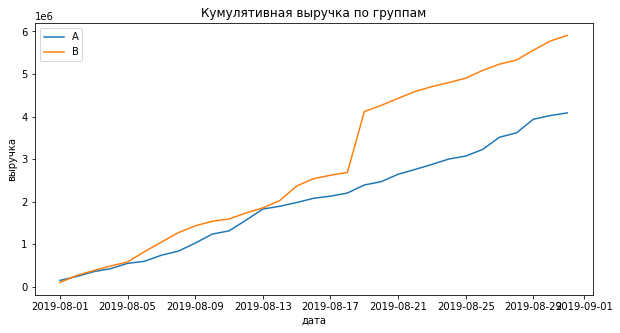

In [ ]:
# Сохраним данные о датах, выручке и числе заказов в группах A и B в переменных
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(10, 5))
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend() 
plt.title('Кумулятивная выручка по группам')
plt.ylabel('выручка')
plt.xlabel('дата')

plt.show()


Выручка по группам равномерно увеличивалась в начале теста, но после 17-08-2019 группа B вырвалась вперед и продолжила лидировать. Значит, есть влияние на результат.

2. Построим график кумулятивного среднего чека по группам.

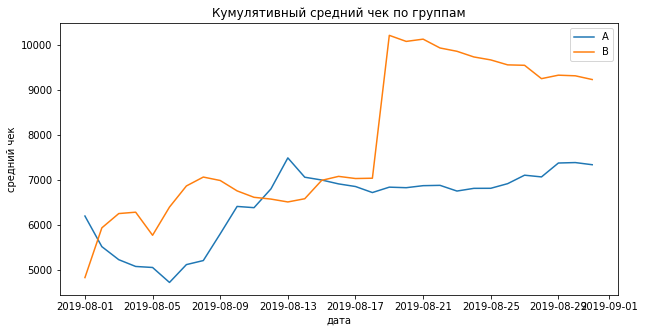

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.legend() 
plt.title('Кумулятивный средний чек по группам')
plt.ylabel('средний чек')
plt.xlabel('дата')

plt.show()


График колебался, но после 17-08-2019 был резкий скачок группы B. Можно сделать вывод, что эта метрика влияет на результат.

3. Построим график относительного изменения кумулятивного среднего чека группы B к группе A.

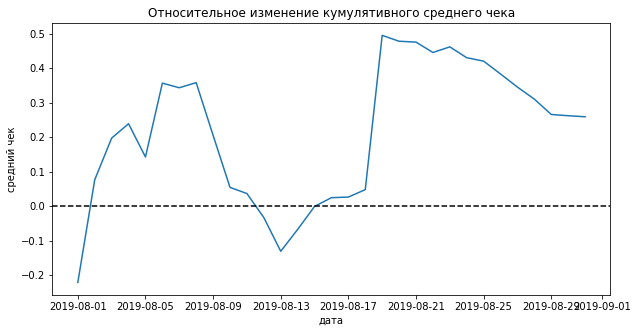

In [ ]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(10, 5))
# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 

plt.title('Относительное изменение кумулятивного среднего чека')
plt.ylabel('средний чек')
plt.xlabel('дата')

plt.show()


Результаты теста значительно колебались в период с 09-08-2019 по 17-08-2019. Скорее всего есть аномальные значения.

4. Построим график кумулятивного среднего количества заказов на посетителя по группам. 

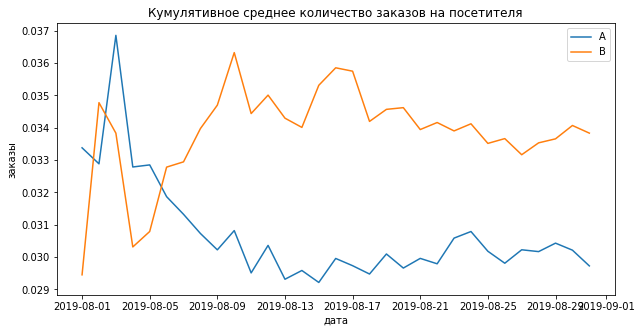

In [ ]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize=(10, 5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

plt.title('Кумулятивное среднее количество заказов на посетителя')
plt.ylabel('заказы')
plt.xlabel('дата')

plt.show()

Сегмент B имеет большее значение средних количествах заказа на посетителя. Значит, вносимые изменения оказывают влияние на результат.

5. Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. 

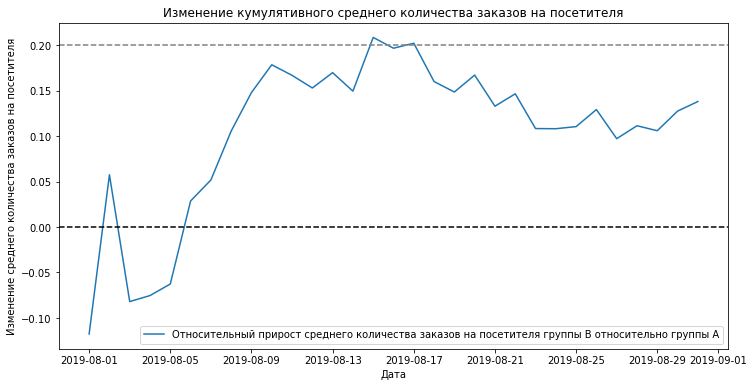

In [ ]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(12, 6))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост среднего количества заказов на посетителя группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.title('Изменение кумулятивного среднего количества заказов на посетителя')
plt.ylabel('Изменение среднего количества заказов на посетителя')
plt.xlabel('Дата')

plt.show()

После второго дня группа B стала лидировать по конверсии, прирост доходит до примерно 20% и после начинает медленно снижаться. В среднем прирост составляет 15%.

6. Построим точечный график количества заказов по пользователям. 

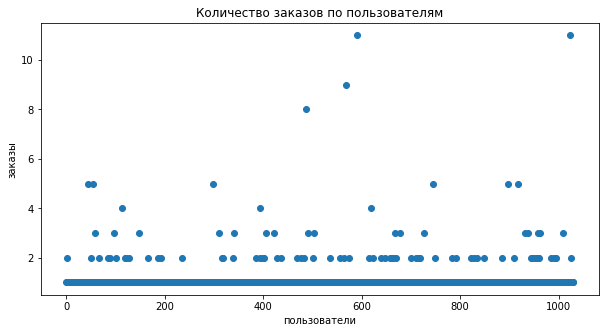

In [ ]:
# число заказов по пользователям
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsers.columns = ['visitorId', 'orders']

plt.figure(figsize=(10, 5))
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders']) 

plt.title('Количество заказов по пользователям')
plt.ylabel('заказы')
plt.xlabel('пользователи')

plt.show()

Большинство пользователей не совершают больше одного заказа. Больше двух заказов уже редкость. Максимальное количество наблюдается у двух пользователей - 11 заказов.

7. Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. 

In [ ]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

Не более 5% пользователей совершали больше 2-ух заказов, не более 1% пользователей совершали больше 4-х заказов. Пользователей, совершившие более 4-х заказов, можно назвать аномальными.

8. Построим точечный график стоимостей заказов.

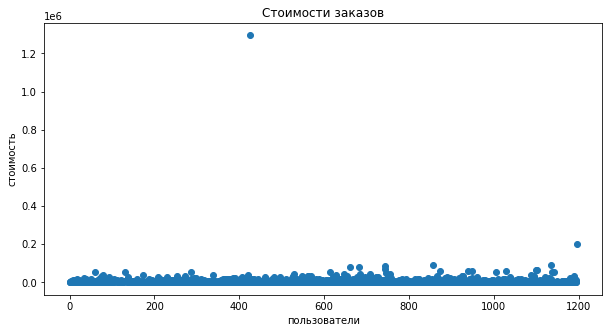

In [ ]:
plt.figure(figsize=(10, 5))
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 

plt.title('Стоимости заказов')
plt.ylabel('стоимость')
plt.xlabel('пользователи')

plt.show()

Заказов более 10000 рублей мало. Есть выбросы - заказ более 20000 рублей и более 120000 рублей. Заказ на 120000 рублей выглядит аномальным.

9. Рассмотрим 95-й и 99-й выборочные перцентили.

In [ ]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

Не более, чем у 5% пользователей заказы больше 28000 рублей и не более, чем у 1% заказы больше 58233,2 рублей. Пользователей, которые совершили заказы на сумму более, чем 60000 рублей, можно назвать аномальными.

Удалим две крупные покупки и рассмотрим распределение без них.

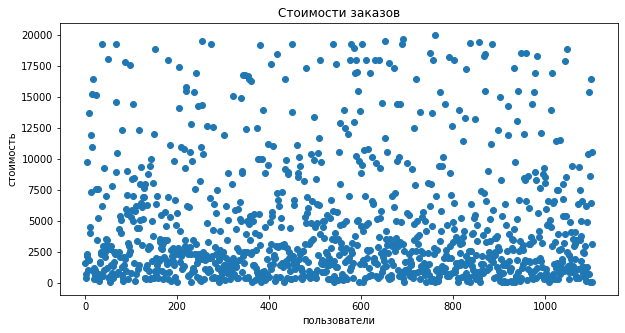

In [ ]:
orders = orders[orders['revenue'] < 20000]
plt.figure(figsize=(10, 5))
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 

plt.title('Стоимости заказов')
plt.ylabel('стоимость')
plt.xlabel('пользователи')

plt.show()

Больше не видно аномальных покупок.

10. Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

In [ ]:
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']


ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

In [ ]:
# ordersByUsersA и ordersByUsersB - количество заказов по пользователям, совершивших более 1 заказа
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 

# sampleA и sampleB - переменные, в которых пользователям с заказами будет соответствовать число заказов пользователя, а пользователям без заказов — нули. 
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visitors[visitors['group'] == 'A']['visitors'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visitors[visitors['group'] == 'B']['visitors'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)


Проверим гипотезы, используя непараметрический тест Уилкоксона-Манна-Уитни. Выбран этот статистический критерий, так как в данных есть небольшие выбросы.

- **Нулевая гипотеза:** в "сырых" данных нет статистически значимых различий среднего количества заказов на посетителя по результатам месячного теста 
- **Альтернативная гипотеза:** есть статистически значимые различия

In [ ]:
# p-value по тесту Манна-Уитни для статистической значимости различия среднего количества заказов

print('p-value по тесту Манна-Уитни:', "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

p-value по тесту Манна-Уитни: 0.023


In [ ]:
print('Относительная разница между группами:', "{0:.3f}".
      format((ordersBDaily['ordersPerDateB'].sum()/
              visitors[visitors['group'] == 'B']['visitors'].sum())/
             (ordersADaily['ordersPerDateA'].sum()/
              visitors[visitors['group'] == 'A']['visitors'].sum())-1))

Относительная разница между группами: 0.133


p-value менее 0,05, отвергаем нулевую гипотезу. По сырым данным можно сказать, что в среднем количестве заказов между группами есть статистически значимые различия и относительная разница составляет 13,3%.

11. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. 

- **Нулевая гипотеза:** в "сырых" данных нет статистически значимых различий в среднем чеке заказа 
- **Альтернативная гипотеза:** есть статистически значимые различия

In [ ]:
print('p-value по тесту Манна-Уитни:', '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))

p-value по тесту Манна-Уитни: 0.800


In [ ]:
print('Относительная разница между группами:', '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

Относительная разница между группами: -0.016


p-value больше 0,05 - статистически значимых отличий в среднем чеке между группами нет. 
Относительное различие среднего чека между сегментами отрицательное, так как прироста нет.

12. Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

- **Нулевая гипотеза:** в "очищенных" данных нет статистически значимых различий среднего количества заказов на посетителя по результатам теста 
- **Альтернативная гипотеза:** есть статистически значимые различия

In [ ]:
# Подготовка очищенных данных, сделаем срезы с аномальными пользователями

usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > np.percentile(ordersByUsersA['userId'], 95)]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > np.percentile(ordersByUsersA['userId'], 95)]['userId'],
    ],
    axis=0,
)

usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], 99)]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

Посмотрим на абсоютные и относительные потери после очистки данных.

In [ ]:
print('Абсолютные потери:', abnormalUsers.count())
print('Относительные потери:', round(len(abnormalUsers.unique())/len(orders['visitorId'].unique())*100, 2))

Абсолютные потери: 8
Относительные потери: 0.83


Было потеряно 8 аномальных пользователей, а относительные потери составили 0,83%

In [ ]:
# очищенные данные

sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group'] == 'A']['visitors'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group'] == 'B']['visitors'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [ ]:
# p-value, статистическая значимость
print('p-value по тесту Манна-Уитни:', '{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))

p-value по тесту Манна-Уитни: 0.029


In [ ]:
# Относительное различие между группами
print('Относительная разница между группами:', '{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

Относительная разница между группами: 0.128


p-value меньше 0,05. Значит, статистическая значимость достигнута и сегмент B лучше сегмента A. Относительный прирост среднего группы В к конверсии группы А равен 12,8%.

13. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

- **Нулевая гипотеза:** в "очищенных" данных нет статистически значимых различий в среднем чеке по результатам теста 
- **Альтернативная гипотеза:** есть статистически значимые различия

In [ ]:
# p-value, статистическая значимость
print('p-value по тесту Манна-Уитни:', '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    ))                    

p-value по тесту Манна-Уитни: 0.951


In [ ]:
# Относительное различие между группами
print('Относительная разница между группами:', "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    ))

Относительная разница между группами: -0.038


p-value больше 0,05 - статистически значимых отличий в среднем чеке между группами нет. Относительное различие среднего чека между сегментами отрицательное, прироста нет. После удаления аномальных значений в данных стало меньше шума и результат более точный.


## Вывод

Перед исследованием были получены данные о гипотезах. Они были приоритизированы с помощью фреймворков ICE и RICE. Результаты получились разными, так как обычно используется один фреймворк для приоритизации. Выбирается в соответствии с нужными факторами для исследования.

После A/B-теста были получены результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv. Данные были проанализированы. Просмотрена кумулятивная выручка по группам и среднему чеку, количество заказов на посетителя. Видно, что сегмент B лучше сегмента А. 
Статистическая значимость показала, что есть статистически значимые различия и прирост для сегмента В. 

По результам теста можно принять решение остановить тест и зафиксировать победу группы B. Изменения, действительно, влияют на результат, есть значимые различия и прирост от них - значительно растет количество заказов и, соответственно, выручка. Значит, цель изменений была достигнута и тест можно не продолжать.